ESPESOR VARIABLE 

-0.07029829312937798
Slope1:-6.694265193824709e-07+/-4.643585100093429e-08
Intercept1:-0.29300174329153367+/-0.030802058918189653
0.0
Slope1:-6.460216947692784e-07+/-5.604259371890362e-08
Intercept1:-0.31696480348000944+/-0.037174451128786305
0.07029829312937798
Slope1:-5.22141667713221e-07+/-8.506439525422538e-08
Intercept1:-0.26249721472329274+/-0.056425336415350816
0.1405751727176739
Slope1:-3.779474005179912e-07+/-1.098371857625694e-07
Intercept1:-0.09626141331710211+/-0.07285774664060177
0.21080923174657776
Slope1:-3.519655317563848e-07+/-1.5455988794149463e-07
Intercept1:0.06714901659599654+/-0.10252343118826274
0.28097907624133667
Slope1:-3.7794518811775895e-07+/-1.6784442815754976e-07
Intercept1:0.08317750262038523+/-0.11133539827007108
0.35106333178756705
Slope1:-3.678094481835114e-07+/-1.0432545332427475e-07
Intercept1:-0.0011633016452519639+/-0.06920167695207095
0.4210406500421081
Slope1:-4.3244974155030905e-07+/-7.625163916242372e-08
Intercept1:-0.030278980205273802+/-0.050

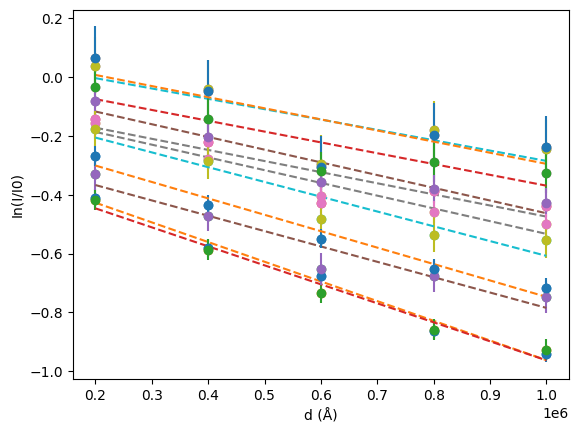

In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt
Intensidades={}
I0=[]
de=2.014


files=['sin muestra.txt','aluminio 0.02.txt','aluminio 0.04.txt','aluminio 0.06.txt','aluminio 0.08.txt','aluminio 0.1.txt']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

d=np.array([0.02e7,0.04e7,0.06e7,0.08e7,0.1e7])

mus=[]
lambdas=[]

for i in files:

    
    

    with open(i, 'r') as file:
        next(file)
        next(file)
        next(file)

        

        reader = csv.reader(file, delimiter='\t')
        angles=[]
        erre=[]
        p=0
        for row in reader:
            
            tetha=np.deg2rad(float(row[0].replace(",", "."))-7)
            lambda_= de*np.sin(tetha)*2
            if lambda_ not in Intensidades:
                Intensidades[lambda_]=[]
            if i!= 'sin muestra.txt':
                    Intensidades[lambda_].append((float(row[1].replace(",", ".")))/I0[p])
                   
            else:
                    I0.append(float(row[1].replace(",", ".")))

            p+=1

for i in Intensidades.keys():

    intensidad=np.log(np.array(Intensidades[i]))

    A1 = np.vstack([d, np.ones(len(d))]).T
    m1, c1 = np.linalg.lstsq(A1, intensidad, rcond=None)[0]


    mus.append(m1)
    lambdas.append(np.float64(i))

    residuals = intensidad - (m1 * d + c1)
    residual_sum_of_squares = np.sum(residuals ** 2)
    std_err = np.sqrt(residual_sum_of_squares / (len(d) - 2)) 
    std_err_slope = std_err / np.sqrt(np.sum((d - np.mean(d)) ** 2)) 
    std_err_intercept = std_err_slope * np.sqrt(np.sum(d ** 2) / len(d))
    print(i)                                       
    print("Slope1:" + str(m1) + "+/-"+ str(std_err_slope))
    print("Intercept1:"+ str(c1)+"+/-"+ str(std_err_intercept))
    
    plt.errorbar(d, intensidad, yerr=std_err, fmt='o')
    plt.plot(d, m1*d + c1, linestyle='--')
    plt.scatter(d, intensidad)





plt.xlabel('d (Å)')
plt.ylabel('In(I/I0)')
plt.show()
    



mu vs lambda

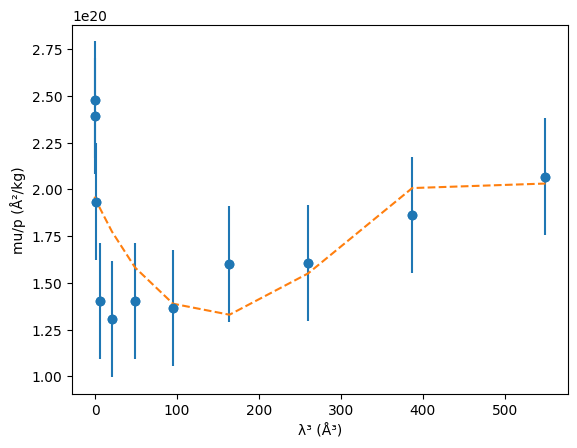

In [4]:


mus=np.array(mus)/-2698e-30
lambdas=np.power(np.array(lambdas), 3)*(13**3)

coefficients = np.polyfit(lambdas, mus, 3)
p = np.poly1d(coefficients)
y_fit = p(lambdas)

residuals = mus - y_fit
error_values = np.std(residuals)


plt.errorbar(lambdas, mus, yerr=error_values, fmt='o')
plt.plot(lambdas, y_fit, linestyle='--')
plt.scatter(lambdas, mus)
plt.xlabel('λ³ (Å³)')
plt.ylabel('mu/p (Å²/kg)')
plt.show()















